# Spaceship Titanic

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and understand data

In [2]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Display descriptive statistics, including all types of columns (numeric and categorical)
df_test.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [7]:
# Count the occurrences of each unique value in the colunmns

print(df_train.HomePlanet.value_counts())
print("\n")

print(df_train.Destination.value_counts())
print("\n")

print(df_train.CryoSleep.value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


False    5439
True     3037
Name: CryoSleep, dtype: int64


In [8]:
# Check for missing values
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
# Check for duplicated rows

print("In the train dataset, there are {} duplicates.".format(df_train.duplicated().sum()))
print("In the test dataset, there are {} duplicates.".format(df_test.duplicated().sum()))

In the train dataset, there are 0 duplicates.
In the test dataset, there are 0 duplicates.


## Exploratory Data Analysis

### Missing Data

Approximately 2% of the data is missing across most columns. Let's examine the distribution of null values.

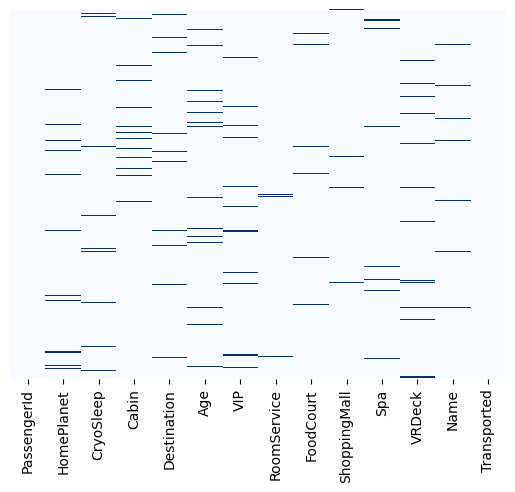

In [11]:
# Create a heatmap to visualize the presence of null values in the df_train DataFrame
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='Blues');

The missing values are distributed quite evenly throughout the dataset. It's not feasible to drop them since the test data also contains missing values. Removing them would lead to a loss of labels and potentially lower our score. Instead, we need to employ imputation techniques to fill in these missing values with the most appropriate replacements.

Let's explore additional data through visualization. We'll focus on analyzing the training dataset while ensuring that any changes made are reflected in both datasets.

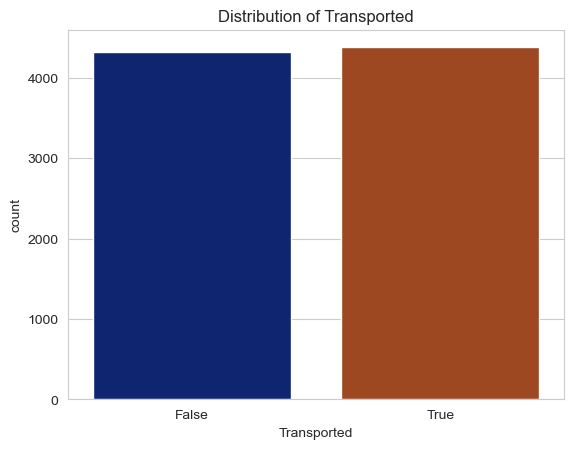

In [12]:
sns.set_style('whitegrid')

# Create a count plot to visualize the distribution of the 'Transported' column in the df_train DataFrame
sns.countplot(x='Transported', data=df_train, palette='dark')

# Add a title to the plot
plt.title('Distribution of Transported')
plt.show()


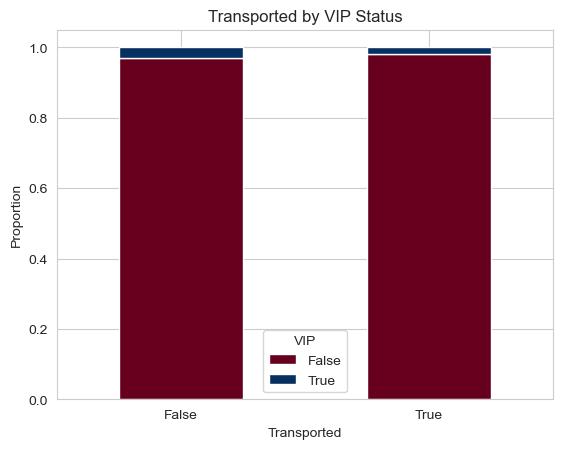

In [13]:
# Create a cross-tabulation
ct = pd.crosstab(df_train['Transported'], df_train['VIP'], normalize='index')

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, colormap='RdBu')

# Add a title to the plot
plt.title('Transported by VIP Status')

# Add labels to the x and y axes
plt.xlabel('Transported')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Horizontal x labels

# Add legend
plt.legend(title='VIP')
plt.show()

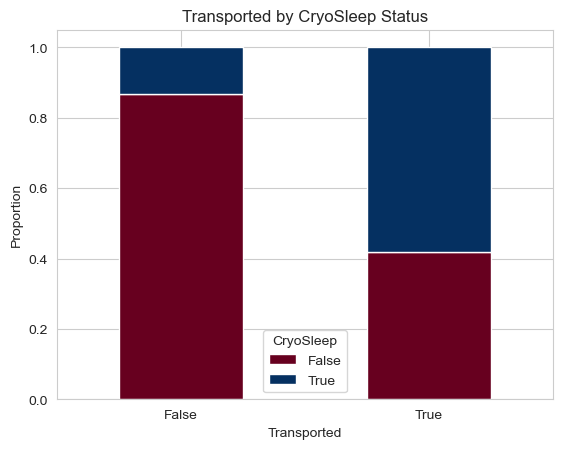

In [14]:
# Create a cross-tabulation
ct = pd.crosstab(df_train['Transported'], df_train['CryoSleep'], normalize='index')

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, colormap='RdBu')

# Add a title to the plot
plt.title('Transported by CryoSleep Status')

# Add labels to the x and y axes
plt.xlabel('Transported')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Horizontal x labels

# Add legend
plt.legend(title='CryoSleep')
plt.show()

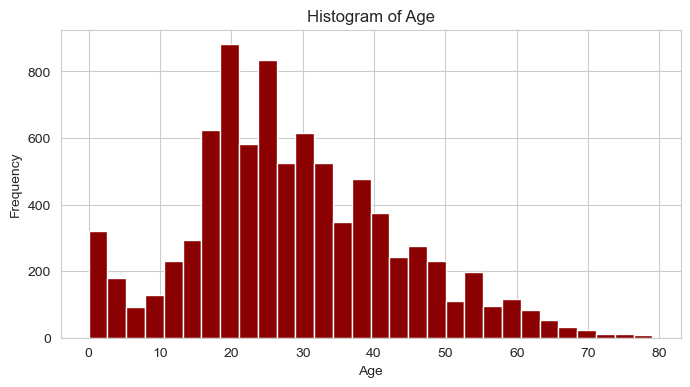

In [15]:
# Plot a histogram of the 'Age' column in the df_train 
df_train.Age.hist(color='darkred', bins=30, figsize=(8,4))

# Add labels to the x and y axes
plt.xlabel('Age')  
plt.ylabel('Frequency')  

# Add a title to the plot
plt.title('Histogram of Age')

plt.show()

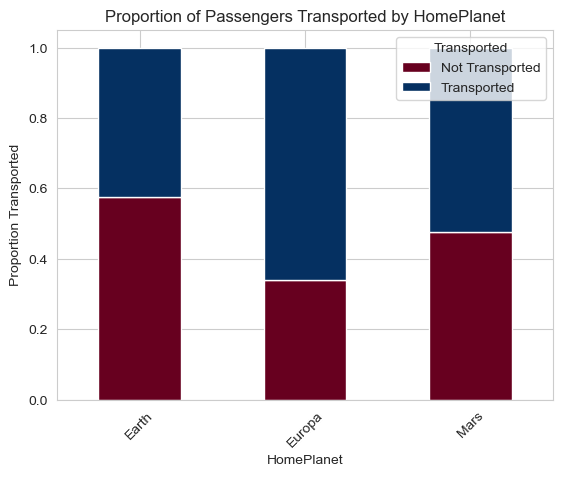

In [16]:
df_train_copy = df_train.copy() 
# Convert 'Transported' to an integer to ease calculations (True to 1, False to 0)
df_train_copy['Transported'] = df_train_copy['Transported'].astype(int)

# Calculate the proportion of Transported for each category in 'HomePlanet'
proportion_data = df_train_copy.groupby('HomePlanet')['Transported'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
proportion_data.plot(kind='bar', stacked=True, colormap='RdBu')

# Add a title to the plot
plt.title('Proportion of Passengers Transported by HomePlanet')

# Add labels to the x and y axes
plt.xlabel('HomePlanet')
plt.ylabel('Proportion Transported')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

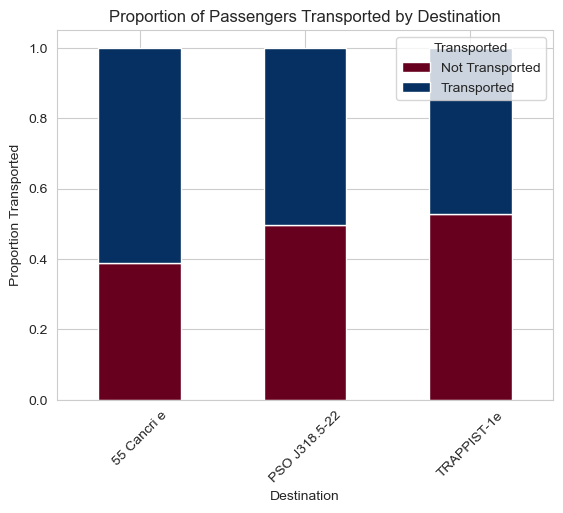

In [17]:
# Calculate the proportion of Transported for each category in 'Destination'
proportion_data = df_train_copy.groupby('Destination')['Transported'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
proportion_data.plot(kind='bar', stacked=True, colormap='RdBu')

# Add title to the plot
plt.title('Proportion of Passengers Transported by Destination')

# Add labels to the x and y axes
plt.xlabel('Destination')
plt.ylabel('Proportion Transported')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

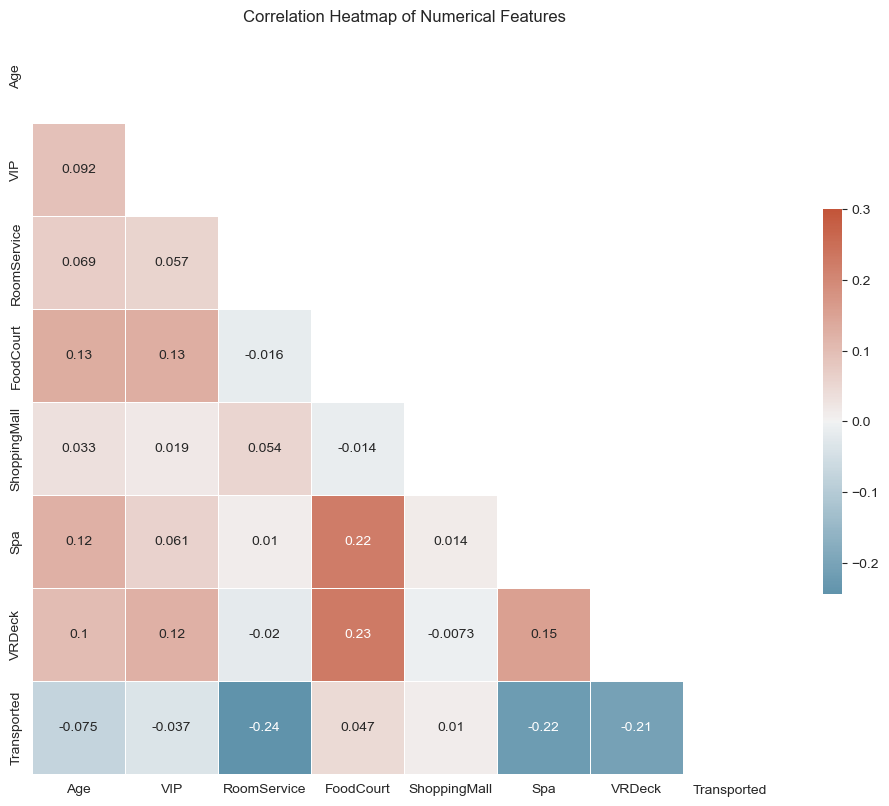

In [18]:
# Convert 'VIP' to an integer (True to 1, False to 0)
df_train_copy['VIP'] = df_train_copy['VIP'].fillna(0).astype(int)

corr_matrix = df_train_copy.corr(numeric_only=True)

# Increase the figure size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### Observations from the visualizations:
- Approximately 50% of passengers were transported, while the other 50% were not.
- The `Cryo sleep` status appears to be correlated with being transported.
- The majority of passengers fall within the age range of ***17-35 years***, with some ***babies*** also on board.
- Individuals originating from ***Europa*** as their `HomePlanet` seem to have a higher likelihood of being transported.
- Passengers with ***55 Cancri e*** listed as their `Destination` also show a higher likelihood of being transported.
- Overall, there appears to be ***no significant correlations*** among the numerical columns evident in the data.

## Data Cleaning

In [19]:
# Drop Name column 
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [20]:
# Separate Cabin into 3 columns
df_train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_test['Cabin'].str.split('/', expand=True)

# Drop original columns
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

### Imputation of Missing Values

For **categorical features**, we can simply impute the most common value.

In [21]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'] 

# Most common values in each column
modes = df_train[categorical_columns].mode().iloc[0]

# Fill in missing values with the most common ones
df_train[categorical_columns] = df_train[categorical_columns].fillna(modes)
df_test[categorical_columns] = df_test[categorical_columns].fillna(modes)

Now, let's deal with **numerical features**. 

In [22]:
numerical_cols = df_train.columns[df_train.dtypes == 'float64']

# Fill in missing values with the average value of each column
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].mean())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

## Data Preprocessing

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Change Cabin_Num to int
df_train['Cabin_Num'] = df_train['Cabin_Num'].astype(int)
df_test['Cabin_Num'] = df_test['Cabin_Num'].astype(int)

# Separate features and target
X = df_train.drop(['Transported', 'PassengerId'], axis=1)
y = df_train['Transported'].astype(int)  # Convert boolean 'Transported' to int (True to 1, False to 0)

# Define categorical and numerical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']

# Create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply transformations
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Automated Model Selection with LazyClassifier

**LazyClassifier** automates the evaluation of multiple machine learning models. It fits all available models to the training data and prints their performance metrics for comparison. This simplifies the process of selecting the best model for the dataset without manual tuning.

In [24]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier to fit all models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance of all models
print(models)

100%|██████████| 29/29 [00:18<00:00,  1.53it/s]

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1667
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.81               0.81     0.81      0.81   
XGBClassifier                      0.80               0.80     0.80      0.80   
RandomForestClassifier             0.79               0.79     0.79      0.79   
SVC                                0.79   

## Hyperparameter Tuning with GridSearchCV

We will perform hyperparameter tuning for the LGBMClassifier using GridSearchCV. It utilizes the LightGBM library for gradient boosting and the scikit-learn GridSearchCV for exhaustive parameter search.

In [25]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Initialize the LGBMClassifier
classifier = lgb.LGBMClassifier()

# Hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'min_data_in_leaf': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
}

# GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1, verbose=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Evaluate on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metric: accuracy_score
print("Validation accuracy: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1648
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Best parameters found:  {'learning_rate': 0.05, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 31}
Best accuracy found:  0.8132004820299045
[LightGBM] [Warning] min_data_in_leaf is set=20, mi

## Training and Evaluation with LightGBM Classifier

In [26]:
# Initialize the LightGBM classifier with specified hyperparameters
best_lgbm = lgb.LGBMClassifier(learning_rate=0.05, min_data_in_leaf=20, n_estimators=100, num_leaves=31)

# Fit the classifier to the training data
best_lgbm.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_lgbm.predict(X_test)

# Print the validation accuracy using the accuracy_score metric
print("Validation accuracy: ", accuracy_score(y_test, predictions))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1648
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Validation accuracy:  0.8079355951696378


## Submission

In [34]:
## Data Preprocessing

# Separate features and target
X_train = df_train.drop(['Transported', 'PassengerId'], axis=1)
y_train = df_train['Transported'].astype(int)  # Convert boolean 'Transported' to int (True to 1, False to 0)
X_test = df_test.drop('PassengerId', axis=1)

# Define categorical and numerical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']

# Create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply transformations
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the test data using the same preprocessor
X_test_transformed = preprocessor.transform(X_test)

In [37]:
# Initialize the LightGBM classifier with specified hyperparameters
lgbm = lgb.LGBMClassifier(learning_rate=0.05, min_data_in_leaf=20, n_estimators=100, num_leaves=31)

# Fit the classifier to the training data
lgbm.fit(X_train_transformed, y_train)

# Make predictions on the test data
predictions = lgbm.predict(X_test_transformed)

# Store the predictions in a new dataframe
pred_df = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                       'Transported': predictions})

# Change the data type of the 'Transported' column to boolean
pred_df['Transported'] = pred_df['Transported'].astype(bool)

pred_df.head()


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [38]:
# Write the DataFrame to a CSV file without including the index
pred_df.to_csv("submission1.csv", index=False)